# Fake News Detection




### Team Members:
- Piyush Kumar Roy  
- Anu Thomas


## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
# !pip install --upgrade numpy==1.26.4
# !pip install --upgrade pandas==2.2.2
# !pip install --upgrade nltk==3.9.1
# !pip install --upgrade spacy==3.7.5
# !pip install --upgrade scipy==1.9.3
# !pip install --upgrade pydantic==2.10.5
# !pip install wordcloud==1.9.4
# !python -m spacy download en_core_web_sm

## Importing the necessary libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [ ]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the first file - True.csv
true_raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/True.csv')
# Import the second file - Fake.csv
fake_raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [ ]:
# Inspect the DataFrame with True News to understand the given data
true_raw_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [ ]:
# Inspect the DataFrame with Fake News to understand the given data
fake_raw_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

In [ ]:
# Print the column details for True News DataFrame
true_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [ ]:
# Print the column details for Fake News Dataframe
fake_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [ ]:
# Print the column names of both DataFrames
print("Column names of True Data:", true_raw_data.columns)
print("Column names of Fake Data:", fake_raw_data.columns)

Column names of True Data: Index(['title', 'text', 'date'], dtype='object')
Column names of Fake Data: Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [ ]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_raw_data['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_raw_data['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [ ]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_raw_data = pd.concat([true_raw_data, fake_raw_data], ignore_index=True)

In [ ]:
# Display the first 5 rows of the combined DataFrame to verify the result
combined_raw_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [ ]:
# Check Presence of Null Values
combined_raw_data.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [ ]:
# Handle Rows with Null Values
combined_raw_data.dropna(inplace=True)

In [ ]:
combined_raw_data.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [ ]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_raw_data['news_text'] = combined_raw_data['title'] + ' ' + combined_raw_data['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_raw_data = combined_raw_data.drop(['title', 'text'], axis=1)
# Display the first 5 rows of the updated DataFrame to check the result
combined_raw_data.head()

date  news_label  \
0  December 31, 2017            1   
1  December 29, 2017            1   
2  December 31, 2017            1   
3  December 30, 2017            1   
4  December 29, 2017            1   

                                           news_text  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [ ]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = combined_raw_data['news_label']


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write the function here to clean the text and remove all the unnecessary elements

def clean_text(text):
    """
    Cleans the input text by converting to lowercase, removing text in square brackets,
    removing punctuation, and removing words containing numbers.
    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned text.
    """
    # Convert to lower case
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [ ]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] = combined_raw_data['news_text'].apply(clean_text)

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def lemmatize_text(text):
    """
    Lemmatizes the input text using spaCy and keeps only nouns (NN and NNS tags).

    Args:
        text (str): The input text to be lemmatized.

    Returns:
        str: The lemmatized text containing only nouns.
    """
    doc = nlp(text)  # Process the text with spaCy
    lemmatized_text = " ".join([token.lemma_ for token in doc if token.tag_ in ('NN', 'NNS') and token.text not in stopwords.words('english')])
    return lemmatized_text

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = df_clean['cleaned_text'].progress_apply(lemmatize_text)

100%|██████████| 44898/44898 [1:10:18<00:00, 10.64it/s]


### Save the Cleaned data as a csv file (Recommended)

In [ ]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("/content/drive/MyDrive/Colab Notebooks/data/Clean.csv", index=False)

In [5]:
df_clean = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Clean.csv")

In [ ]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label                                       cleaned_text  \
0           1  as us budget fight looms republicans flip thei...   
1           1  us military to accept transgender recruits on ...   
2           1  senior us republican senator let mr mueller do...   
3           1  fbi russia probe helped by australian diplomat...   
4           1  trump wants postal service to charge much more...   

                                     lemmatized_text  
0  budget fight script head faction month expansi...  
1  military transgender recruit people time milit...  
2  job counsel investigation link trump election ...  
3  probe diplomat trump campaign adviser diplomat...  
4  trump service amazon shipment service ship pac...

In [ ]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [ ]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44898 non-null  int64 
 1   cleaned_text     44898 non-null  object
 2   lemmatized_text  44875 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [6]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=42)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [ ]:
# Add a new column to calculate the character length of cleaned news text
train_df['cleaned_text_len'] = train_df['cleaned_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna('')  # Replace NaN with empty string
train_df['lemmatized_text_len'] = train_df['lemmatized_text'].apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

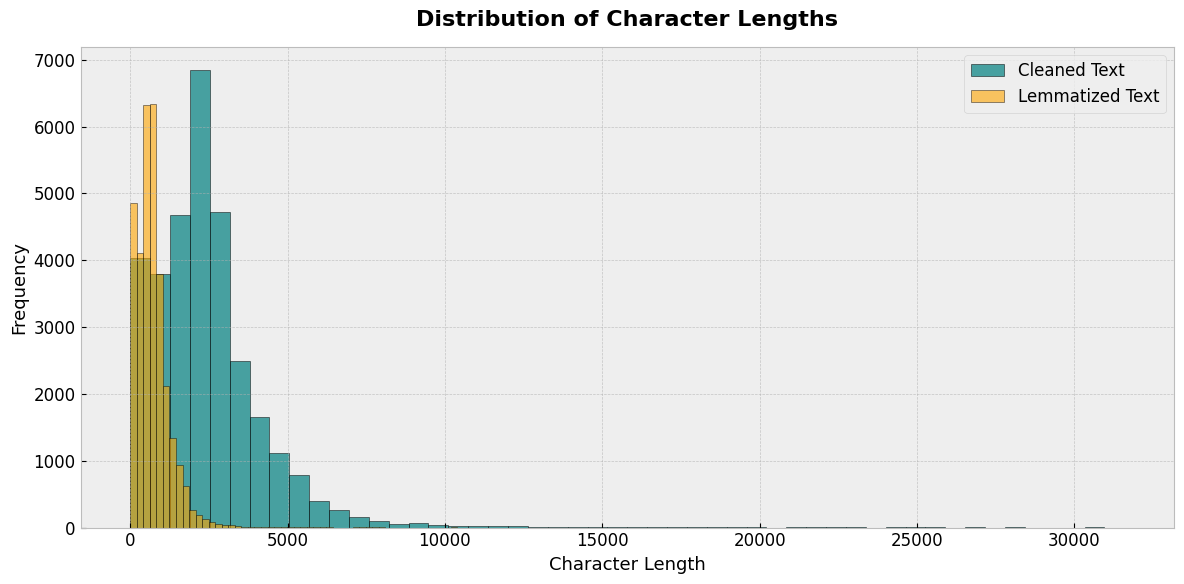

In [ ]:
# Create a histogram plot to visualise character lengths
# Set the style and font
plt.style.use('bmh')
plt.rcParams.update({'font.size': 12})

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Add histogram for cleaned news text
ax.hist(train_df['cleaned_text_len'], bins=50, alpha=0.7, label='Cleaned Text',
        color='#008080', edgecolor='black', linewidth=0.5)

# Add histogram for lemmatized news text with POS tags removed
ax.hist(train_df['lemmatized_text_len'], bins=50, alpha=0.6, label='Lemmatized Text',
        color='#FFA500', edgecolor='black', linewidth=0.5)

# Titles and labels
ax.set_title('Distribution of Character Lengths', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Character Length', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)

# Grid and legend
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.legend(fontsize=12, loc='upper right', frameon=True, fancybox=True)

# Tight layout for spacing
plt.tight_layout()

# Show the plot
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

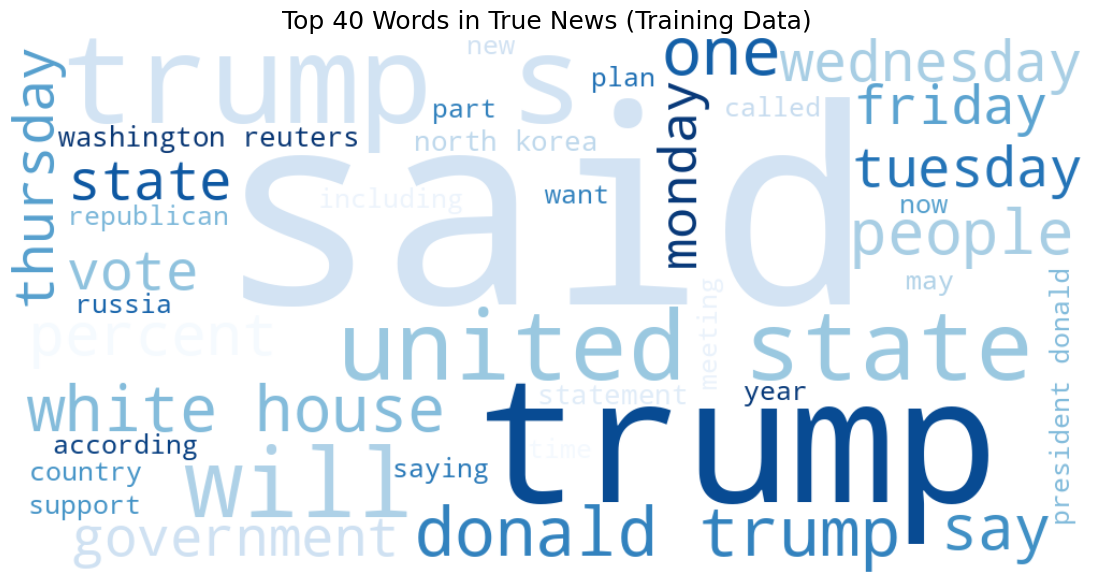

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud, STOPWORDS

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = train_df[train_df['news_label'] == 1]['cleaned_text'].astype(str).str.cat(sep=' ')

# Generate word cloud for True News
true_wordcloud = WordCloud(width=1000, height=500,
                           background_color='white',
                           stopwords=STOPWORDS,
                           colormap='Blues',
                           max_words=40,
                           contour_color='steelblue',
                           contour_width=2).generate(true_news_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title('Top 40 Words in True News (Training Data)', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

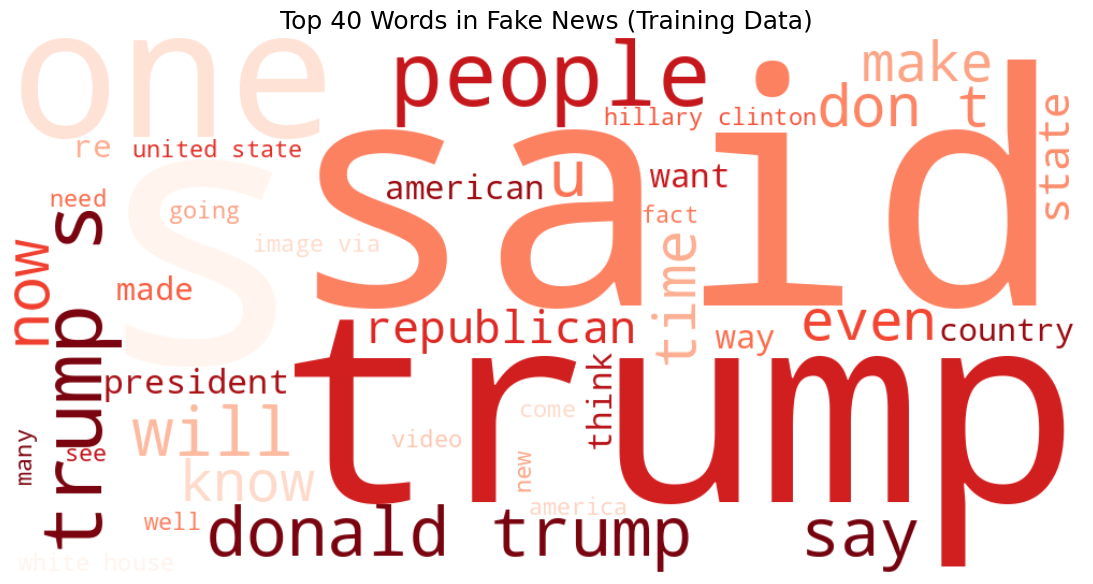

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
from wordcloud import WordCloud, STOPWORDS

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = train_df[train_df['news_label'] == 0]['cleaned_text'].astype(str).str.cat(sep=' ')

# Generate word cloud for Fake News
fake_wordcloud = WordCloud(width=1000, height=500,
                           background_color='white',
                           stopwords=STOPWORDS,
                           colormap='Reds',
                           max_words=40,
                           contour_color='darkred',
                           contour_width=2).generate(fake_news_text)
# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Top 40 Words in Fake News (Training Data)', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [8]:
# Write a function to get the specified top n-grams
def get_top_ngrams(corpus, n, top_k):
    """
    Extracts the top k most frequent n-grams from a corpus of text.

    Args:
        corpus (list): A list of text documents.
        n (int): The n-gram size (e.g., 1 for unigrams, 2 for bigrams, 3 for trigrams).
        top_k (int): The number of top n-grams to return.

    Returns:
        list: A list of tuples, where each tuple contains an n-gram and its frequency.
    """
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)  # Create CountVectorizer object
    bag_of_words = vec.transform(corpus)  # Transform corpus into bag-of-words
    sum_words = bag_of_words.sum(axis=0)  # Sum word frequencies across documents
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]  # Get word frequencies
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)  # Sort by frequency
    return words_freq[:top_k]  # Return top k n-grams

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [9]:
# Handle NaN values in the text data
train_df['cleaned_text'] = train_df['cleaned_text'].fillna('')
train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [10]:
from tabulate import tabulate

Top 10 Unigrams in True News:
+---------+-----------+
| Unigram | Frequency |
+---------+-----------+
|   the   |  335761   |
|   to    |  176238   |
|   of    |  144647   |
|   in    |  128832   |
|   and   |  127189   |
|   on    |   78036   |
|  said   |   68805   |
|  that   |   61759   |
|   for   |   57390   |
|  trump  |   40732   |
+---------+-----------+


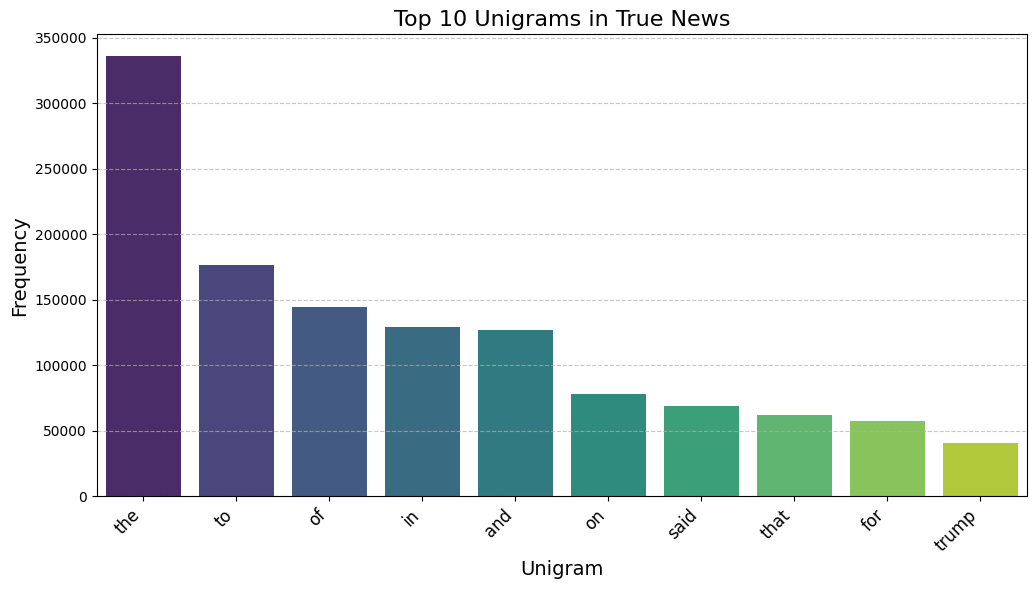

In [11]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

# Filter true news for cleaned text
true_news_texts = train_df[train_df['news_label'] == 1]['cleaned_text'].fillna("").tolist()

# Get top 10 unigrams using the get_top_ngrams function
top_10_unigrams = get_top_ngrams(true_news_texts, 1, 10)

# Print the top 10 unigrams
table_data = [(unigram, frequency) for unigram, frequency in top_10_unigrams]
headers = ["Unigram", "Frequency"]
print("Top 10 Unigrams in True News:")
print(tabulate(table_data, headers, tablefmt="pretty"))

# Prepare data for plotting
unigrams = [unigram for unigram, frequency in top_10_unigrams]
frequencies = [frequency for unigram, frequency in top_10_unigrams]

# Plot the top 10 unigrams as a bar graph
plt.figure(figsize=(12, 6))

# Create bar plot with customized colors
sns.barplot(x=unigrams, y=frequencies, palette='viridis')

# Add title and labels with larger font sizes
plt.title('Top 10 Unigrams in True News', fontsize=16)
plt.xlabel('Unigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
+---------------+-----------+
|    Bigram     | Frequency |
+---------------+-----------+
|    of the     |   33418   |
|    in the     |   29006   |
|    to the     |   15527   |
|    on the     |   11674   |
|    for the    |   10772   |
|  the united   |   9970    |
|   said the    |   8609    |
|    the us     |   8606    |
| united states |   8594    |
|    and the    |   8585    |
+---------------+-----------+


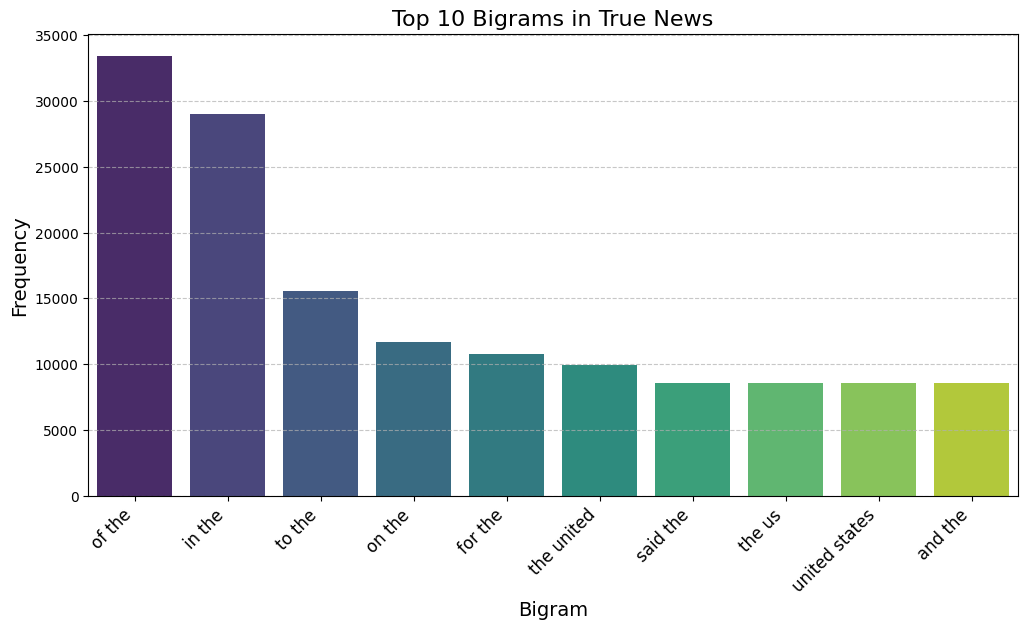

In [13]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

# Get top 10 bigrams using the get_top_ngrams function
top_10_bigrams = get_top_ngrams(true_news_texts, 2, 10)

# Print the top 10 bigrams
table_data = [(bigram, frequency) for bigram, frequency in top_10_bigrams]
headers = ["Bigram", "Frequency"]
print("Top 10 Bigrams in True News:")
print(tabulate(table_data, headers, tablefmt="pretty"))

# Prepare data for plotting
bigrams = [bigram for bigram, frequency in top_10_bigrams]  # Extract bigrams for y-axis
frequencies = [frequency for bigram, frequency in top_10_bigrams]  # Extract frequencies for x-axis

# Create the bar plot
plt.figure(figsize=(12, 6))

# Create bar plot with customized colors
sns.barplot(x=bigrams, y=frequencies, palette='viridis')

# Add title and labels with larger font sizes
plt.title('Top 10 Bigrams in True News', fontsize=16)
plt.xlabel('Bigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
+--------------------------+-----------+
|         Trigram          | Frequency |
+--------------------------+-----------+
|    the united states     |   8393    |
|  president donald trump  |   4065    |
|     the white house      |   3654    |
|    said in statement     |   2651    |
|  president barack obama  |   2014    |
|        one of the        |   1966    |
|   us president donald    |   1763    |
| house of representatives |   1578    |
|    secretary of state    |   1570    |
|        as well as        |   1348    |
+--------------------------+-----------+


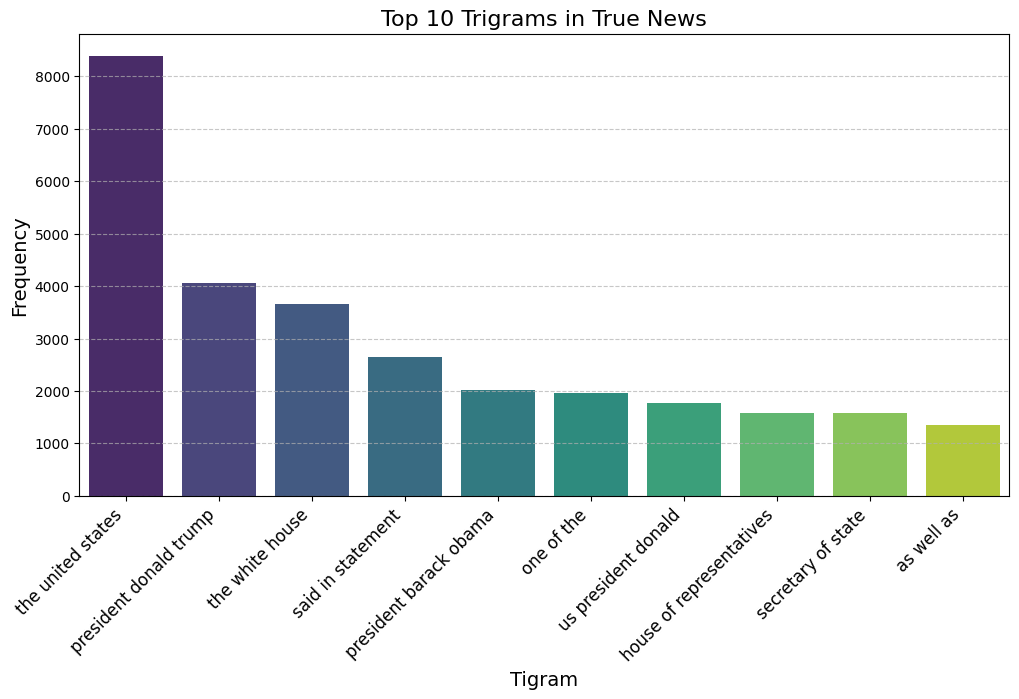

In [14]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

# Get top 10 trigrams using the get_top_ngrams function
top_10_trigrams = get_top_ngrams(true_news_texts, 3, 10)

# Print the top 10 trigrams
table_data = [(trigram, frequency) for trigram, frequency in top_10_trigrams]
headers = ["Trigram", "Frequency"]
print("Top 10 Trigrams in True News:")
print(tabulate(table_data, headers, tablefmt="pretty"))

# Prepare data for plotting
trigrams = [trigram for trigram, frequency in top_10_trigrams]  # Extract trigrams for y-axis
frequencies = [frequency for trigram, frequency in top_10_trigrams]  # Extract frequencies for x-axis

# Create the bar plot
plt.figure(figsize=(12, 6))

# Create bar plot with customized colors
sns.barplot(x=trigrams, y=frequencies, palette='viridis')

# Add title and labels with larger font sizes
plt.title('Top 10 Trigrams in True News', fontsize=16)
plt.xlabel('Tigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
+---------+-----------+
| Unigram | Frequency |
+---------+-----------+
|   the   |  366809   |
|   to    |  207013   |
|   of    |  165294   |
|   and   |  157310   |
|   in    |  116795   |
|  that   |  104142   |
|   is    |   78437   |
|   for   |   66917   |
|   on    |   58737   |
|  trump  |   57553   |
+---------+-----------+


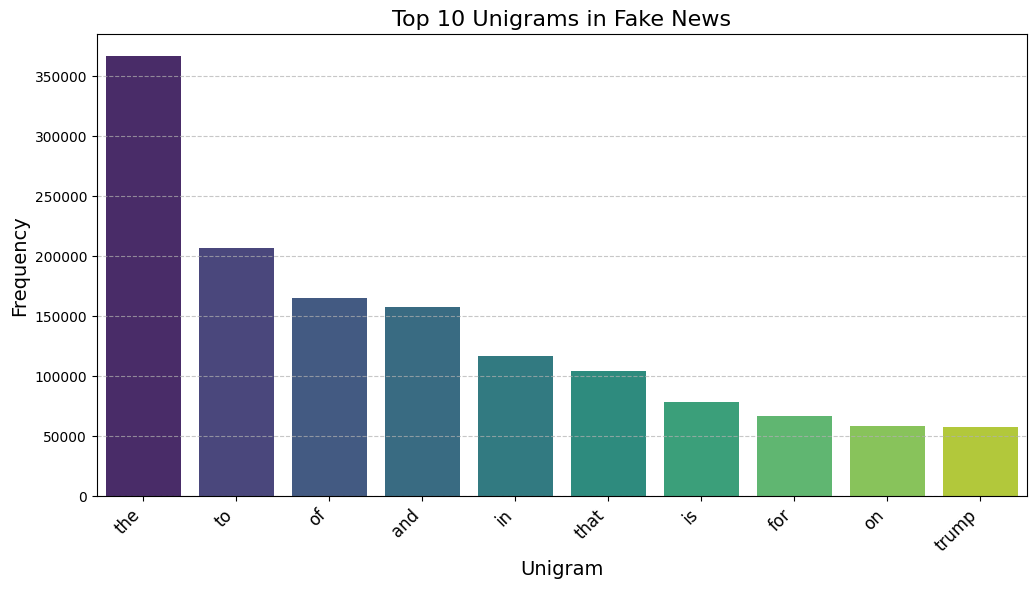

In [15]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

# Filter fake news for cleaned text
fake_news_texts = train_df[train_df['news_label'] == 0]['cleaned_text'].fillna("").tolist()

# Get top 10 unigrams using the get_top_ngrams function
top_10_unigrams = get_top_ngrams(fake_news_texts, 1, 10)

# Print the top 10 unigrams
table_data = [(unigram, frequency) for unigram, frequency in top_10_unigrams]
headers = ["Unigram", "Frequency"]
print("Top 10 Unigrams in Fake News:")
print(tabulate(table_data, headers, tablefmt="pretty"))

# Prepare data for plotting
unigrams = [unigram for unigram, frequency in top_10_unigrams]
frequencies = [frequency for unigram, frequency in top_10_unigrams]

# Plot the top 10 unigrams as a bar graph
plt.figure(figsize=(12, 6))

# Create bar plot with customized colors
sns.barplot(x=unigrams, y=frequencies, palette='viridis')

# Add title and labels with larger font sizes
plt.title('Top 10 Unigrams in Fake News', fontsize=16)
plt.xlabel('Unigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
+--------------+-----------+
|    Bigram    | Frequency |
+--------------+-----------+
|    of the    |   37399   |
|    in the    |   27695   |
|    to the    |   19367   |
|    on the    |   13164   |
|    to be     |   11548   |
| donald trump |   11276   |
|   for the    |   11087   |
|   that the   |   10439   |
|   and the    |   9715    |
|    at the    |   8805    |
+--------------+-----------+


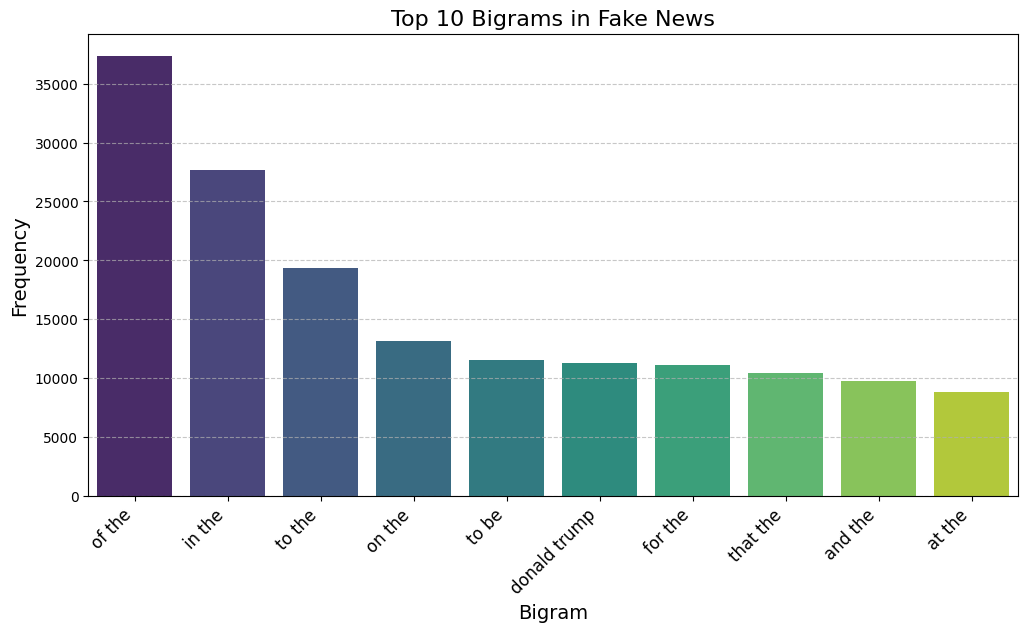

In [16]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

# Get top 10 bigrams using the get_top_ngrams function
top_10_bigrams = get_top_ngrams(fake_news_texts, 2, 10)

# Print the top 10 bigrams
table_data = [(bigram, frequency) for bigram, frequency in top_10_bigrams]
headers = ["Bigram", "Frequency"]
print("Top 10 Bigrams in Fake News:")
print(tabulate(table_data, headers, tablefmt="pretty"))

# Prepare data for plotting
bigrams = [bigram for bigram, frequency in top_10_bigrams]  # Extract bigrams for y-axis
frequencies = [frequency for bigram, frequency in top_10_bigrams]  # Extract frequencies for x-axis

# Create the bar plot
plt.figure(figsize=(12, 6))

# Create bar plot with customized colors
sns.barplot(x=bigrams, y=frequencies, palette='viridis')

# Add title and labels with larger font sizes
plt.title('Top 10 Bigrams in Fake News', fontsize=16)
plt.xlabel('Bigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
+------------------------------+-----------+
|           Trigram            | Frequency |
+------------------------------+-----------+
|      the united states       |   3963    |
|       the white house        |   2913    |
|          one of the          |   2805    |
|        the fact that         |   1774    |
| donald trump realdonaldtrump |   1299    |
|       according to the       |   1273    |
|          as well as          |   1242    |
|        of the united         |   1213    |
|          out of the          |   1185    |
|         the new york         |   1109    |
+------------------------------+-----------+


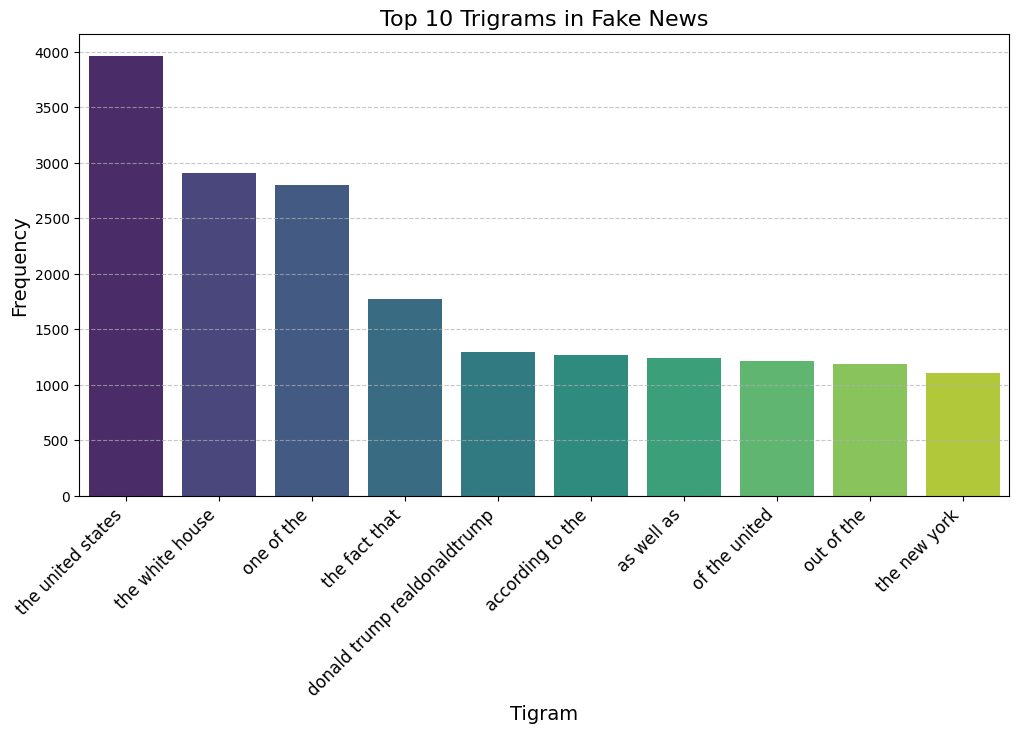

In [17]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph

# Get top 10 trigrams using the get_top_ngrams function
top_10_trigrams = get_top_ngrams(fake_news_texts, 3, 10)

# Print the top 10 trigrams
table_data = [(trigram, frequency) for trigram, frequency in top_10_trigrams]
headers = ["Trigram", "Frequency"]
print("Top 10 Trigrams in Fake News:")
print(tabulate(table_data, headers, tablefmt="pretty"))

# Prepare data for plotting
trigrams = [trigram for trigram, frequency in top_10_trigrams]  # Extract trigrams for y-axis
frequencies = [frequency for trigram, frequency in top_10_trigrams]  # Extract frequencies for x-axis

# Create the bar plot
plt.figure(figsize=(12, 6))

# Create bar plot with customized colors
sns.barplot(x=trigrams, y=frequencies, palette='viridis')

# Add title and labels with larger font sizes
plt.title('Top 10 Trigrams in Fake News', fontsize=16)
plt.xlabel('Tigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
# !pip install --upgrade gensim==4.3.1

In [ ]:
import gensim.downloader as api

In [ ]:
word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [ ]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def get_word2vec_vectors(texts, model):
    """
    Extracts Word2Vec vectors for a list of texts.

    Args:
        texts (list): A list of text documents.
        model (gensim.models.Word2Vec): The pre-trained Word2Vec model.

    Returns:
        numpy.ndarray: A 2D array of Word2Vec vectors, where each row represents a document.
    """
    vectors = []
    for text in texts:
        tokens = text.split()  # Tokenize the text
        # Removed .wv from model[token]
        word_vectors = [model[token] for token in tokens if token in model]  # Get Word2Vec vectors for each token
        if word_vectors:
            document_vector = np.mean(word_vectors, axis=0)  # Calculate the average vector for the document
            vectors.append(document_vector)
        else:
            vectors.append(np.zeros(model.vector_size))  # Handle cases where no word vectors are found
    return np.array(vectors)



## Extract the target variable for the training data and validation data

# Extract vectors for training data
train_vectors = get_word2vec_vectors(train_df['cleaned_text'].fillna("").tolist(), word2vec_model)

# Extract vectors for validation data
val_vectors = get_word2vec_vectors(val_df['cleaned_text'].fillna("").tolist(), word2vec_model)

# Extract target variable for training data
train_labels = train_df['news_label'].values

# Extract target variable for validation data
val_labels = val_df['news_label'].values

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [ ]:
## Initialise Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

## Train Logistic Regression model on training data
logreg_model.fit(train_vectors, train_labels)

## Predict on validation data
val_predictions_logreg = logreg_model.predict(val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Calculate metrics
accuracy = accuracy_score(val_labels, val_predictions_logreg)
precision = precision_score(val_labels, val_predictions_logreg)
recall = recall_score(val_labels, val_predictions_logreg)
f1 = f1_score(val_labels, val_predictions_logreg)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9592
Precision: 0.9508
Recall: 0.9651
F1-score: 0.9579


In [ ]:
# Classification Report

# Generate classification report
report = classification_report(val_labels, val_predictions_logreg)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6996
           1       0.95      0.97      0.96      6474

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



In [ ]:
from sklearn.metrics import confusion_matrix

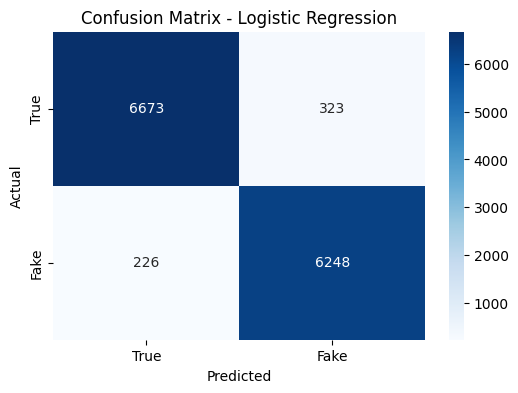

In [ ]:
cm = confusion_matrix(val_labels, val_predictions_logreg)

# Option 1: Using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dt_model.fit(train_vectors, train_labels)

## Predict on validation data
val_predictions_dt = dt_model.predict(val_vectors)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Calculate metrics
accuracy_dt = accuracy_score(val_labels, val_predictions_dt)
precision_dt = precision_score(val_labels, val_predictions_dt)
recall_dt = recall_score(val_labels, val_predictions_dt)
f1_dt = f1_score(val_labels, val_predictions_dt)

# Print metrics
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")

Accuracy: 0.8946
Precision: 0.9063
Recall: 0.8707
F1-score: 0.8881


In [ ]:
# Classification Report

# Generate classification report
report_dt = classification_report(val_labels, val_predictions_dt)

# Print the report
print(report_dt)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6996
           1       0.91      0.87      0.89      6474

    accuracy                           0.89     13470
   macro avg       0.90      0.89      0.89     13470
weighted avg       0.89      0.89      0.89     13470



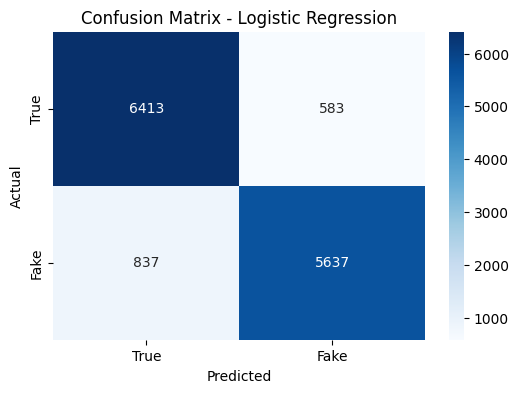

In [ ]:
cm = confusion_matrix(val_labels, val_predictions_dt)

# Option 1: Using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42)

## Train Random Forest model on training data
rf_model.fit(train_vectors, train_labels)

## Predict on validation data
val_predictions_rf = rf_model.predict(val_vectors)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Calculate metrics
accuracy_rf = accuracy_score(val_labels, val_predictions_rf)
precision_rf = precision_score(val_labels, val_predictions_rf)
recall_rf = recall_score(val_labels, val_predictions_rf)
f1_rf = f1_score(val_labels, val_predictions_rf)

# Print metrics
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

Accuracy: 0.9580
Precision: 0.9557
Recall: 0.9569
F1-score: 0.9563


In [ ]:
# Classification Report

# Generate classification report
report_rf = classification_report(val_labels, val_predictions_rf)

# Print the report
print(report_rf)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6996
           1       0.96      0.96      0.96      6474

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



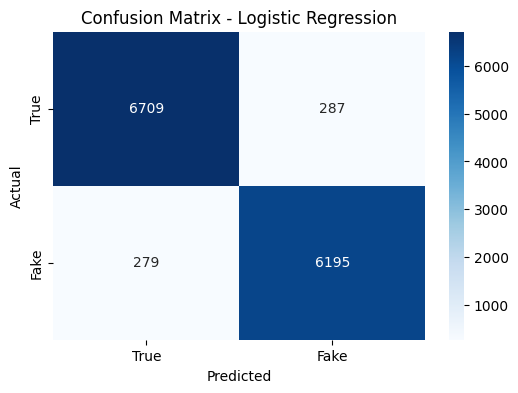

In [ ]:
cm = confusion_matrix(val_labels, val_predictions_rf)

# Option 1: Using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

- True news emphasizes factual and institutional phrases (e.g., “the United States”), while fake news leans toward speculative or emotionally loaded patterns (e.g., “the fact that”).

- By extracting only nouns and removing stopwords, the semantic process emphasizes meaningful, topic-relevant words while filtering out distracting or generic language—sharpening classification accuracy.

- The lemmatized text shows shorter, more consistent character lengths, indicating reduced noise and improved uniformity—ideal for machine learning models.

---

#### Best Model Selected: Logistic Regression

**Logistic Regression** outperformed other models with:




- **Accuracy:** 95.92%  
- **Precision:** 95.08%  
- **Recall:** 96.51%  
- **F1-score:** 95.79%  

It achieved the **highest recall**, which was crucial for the nature of the problem.

---

#### Evaluation Metric Prioritized: Recall

**Recall (Sensitivity)** measures the ability of a model to correctly identify actual fake news.

In this domain, **missing a fake news article (false negative)** can have severe real-world implications. It’s acceptable to have slightly more **false positives** (i.e., some real news flagged as fake), as the cost is comparatively lower.
